In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# Load dataset
df = pd.read_csv("Harry Potter 1.csv")

# Create a new column for sentiment
df['sentiment'] = df['Sentence'].apply(lambda x: TextBlob(x).sentiment[0])

# Create a new column for sentiment label
df['sentiment_label'] = ''

# Assign sentiment labels based on polarity
df.loc[df['sentiment'] > 0, 'sentiment_label'] = 'Positive'
df.loc[df['sentiment'] == 0, 'sentiment_label'] = 'Neutral'
df.loc[df['sentiment'] < 0, 'sentiment_label'] = 'Negative'

# Print the first 5 rows of the updated dataset
print(df.head())

    Character                                           Sentence  \
0  Dumbledore  I should've known that you would be here, Prof...   
1  McGonagall                Good evening, Professor Dumbledore.   
2  McGonagall                        Are the rumors true, Albus?   
3  Dumbledore                          I'm afraid so, professor.   
4  Dumbledore                              The good and the bad.   

      sentiment sentiment_label  
0  0.000000e+00         Neutral  
1  7.000000e-01        Positive  
2  3.500000e-01        Positive  
3 -6.000000e-01        Negative  
4  5.551115e-17        Positive  


In [38]:
df['Sentence'] = df['Sentence'].str.replace('[^a-zA-Z]', ' ')
df['Sentence'] = df['Sentence'].str.lower()
df.head()

/var/folders/tz/k4y848sd56d7b57921hs2bfm0000gn/T/ipykernel_66562/4021358668.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace('[^a-zA-Z]', ' ')


,Character,Sentence,sentiment,sentiment_label
0,Dumbledore,i should ve known that you would be here prof...,0.000000e+00,Neutral
1,McGonagall,good evening professor dumbledore,7.000000e-01,Positive
2,McGonagall,are the rumors true albus,3.500000e-01,Positive
3,Dumbledore,i m afraid so professor,-6.000000e-01,Negative
4,Dumbledore,the good and the bad,5.551115e-17,Positive


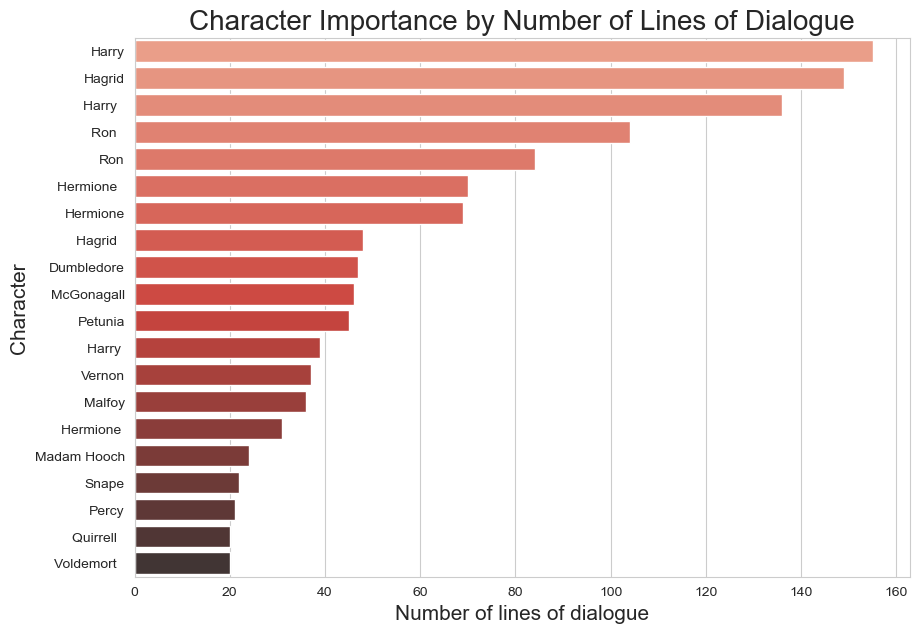

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(y='Character', data=df, order=df.Character.value_counts().iloc[:20].index, palette="Reds_d")
plt.xlabel('Number of lines of dialogue', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.title('Character Importance by Number of Lines of Dialogue', fontsize=20)
plt.show()

In [40]:
from collections import Counter
all_text = " ".join(text for text in df['Sentence'])
words = all_text.split()
word_counts = Counter(words)
print(word_counts.most_common(8))

[('you', 394), ('i', 294), ('the', 281), ('s', 250), ('to', 239), ('it', 204), ('a', 200), ('that', 158)]


In [41]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define a function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove symbols
    text = re.sub(r'[^\w\s]','',text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    cleaned_text = " ".join(filtered_words)
    return cleaned_text

# Clean the text column
df['Sentence'] = df['Sentence'].apply(clean_text)

[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


In [42]:
common_words = Counter(" ".join(df["Sentence"]).split()).most_common(10)
common_words

[('harry', 92),
 ('go', 53),
 ('one', 50),
 ('know', 49),
 ('see', 44),
 ('potter', 41),
 ('oh', 40),
 ('well', 38),
 ('come', 38),
 ('right', 36)]

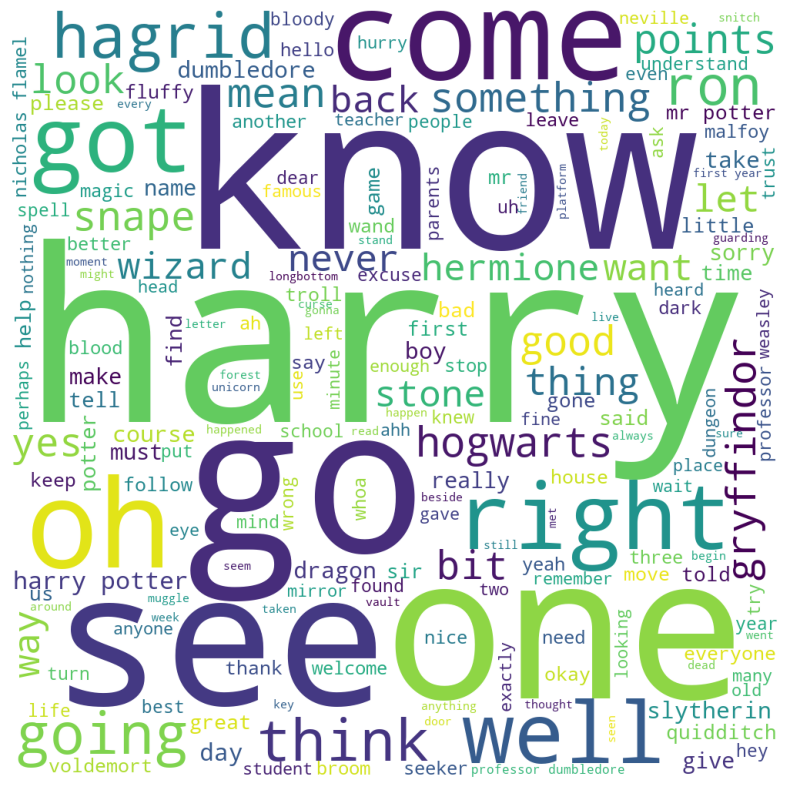

In [43]:
from wordcloud import WordCloud
text = " ".join(line for line in df["Sentence"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [44]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# def extract_emotion(text):
#     sentiment_analyzer = SentimentIntensityAnalyzer()
#     sentiment = sentiment_analyzer.polarity_scores(text)
#     if sentiment['compound'] >= 0.05:
#         return 'Positive'
#     elif sentiment['compound'] <= -0.05:
#         return 'Negative'
#     else:
#         return 'Neutral'
    
# df['emotion'] = ''
# df['emotion'] = df['Sentence'].apply(extract_emotion)
# print(df.head())

In [45]:
df['sentiment_label'].value_counts()['Positive']

312

In [46]:
df['sentiment_label'].value_counts()['Neutral']

1061

In [47]:
df['sentiment_label'].value_counts()['Negative']

214

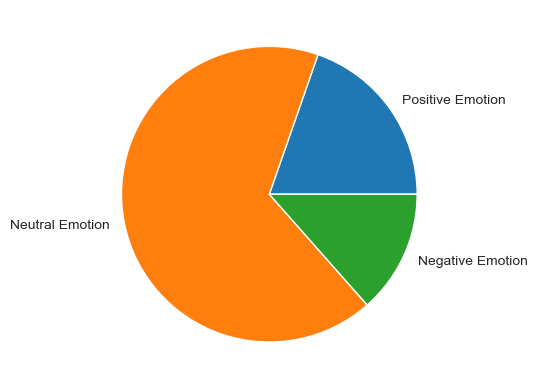

In [48]:
y = np.array([312,1061,214])
mylabels = ["Positive Emotion", "Neutral Emotion", "Negative Emotion"]

plt.pie(y, labels = mylabels)
plt.show() 

In [49]:
# Extract the text data
text_data = df['Sentence'].tolist()

# Tokenize the text data
tokens = [word_tokenize(text) for text in text_data]

# View the tokens
print(tokens)

[['known', 'would', 'professor', 'mcgonagall'], ['good', 'evening', 'professor', 'dumbledore'], ['rumors', 'true', 'albus'], ['afraid', 'professor'], ['good', 'bad'], ['boy'], ['hagrid', 'bringing'], ['think', 'wise', 'trust', 'hagrid', 'something', 'important'], ['ah', 'professor', 'would', 'trust', 'hagrid', 'life'], ['professor', 'dumbledore', 'sir'], ['professor', 'mcgonagall'], ['problems', 'trust', 'hagrid'], ['sir'], ['little', 'tyke', 'fell', 'asleep', 'flying', 'bristol'], ['try', 'wake'], ['go'], ['albus', 'really', 'think', 'safe', 'leaving', 'people'], ['watched', 'day'], ['worst', 'sort', 'muggles', 'imaginable'], ['really'], ['family'], ['boy', 'famous'], ['child', 'world', 'know', 'name'], ['exactly'], ['far', 'better', 'growing', 'away'], ['ready'], ['hagrid'], ['really', 'goodbye'], ['good', 'luck', 'harry', 'potter'], ['get'], [], ['wake', 'cousin'], ['going', 'zoo'], ['comes', 'birthday', 'boy'], ['happy', 'birthday', 'son'], ['cook', 'breakfast', 'try', 'burn', 'any

In [50]:
# Extract the text data
text_data = df['Sentence'].tolist()

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
vectors = vectorizer.fit_transform(text_data)

# View the vocabulary
print(vectorizer.vocabulary_)

# View the vectorized data
print(vectors.toarray())

{'known': 717, 'would': 1511, 'professor': 1021, 'mcgonagall': 813, 'good': 558, 'evening': 404, 'dumbledore': 361, 'rumors': 1111, 'true': 1382, 'albus': 32, 'afraid': 18, 'bad': 82, 'boy': 156, 'hagrid': 582, 'bringing': 167, 'think': 1328, 'wise': 1480, 'trust': 1383, 'something': 1214, 'important': 662, 'ah': 22, 'life': 754, 'sir': 1185, 'problems': 1019, 'little': 762, 'tyke': 1392, 'fell': 463, 'asleep': 67, 'flying': 492, 'bristol': 168, 'try': 1386, 'wake': 1428, 'go': 547, 'really': 1067, 'safe': 1118, 'leaving': 733, 'people': 960, 'watched': 1443, 'day': 300, 'worst': 1509, 'sort': 1221, 'muggles': 861, 'imaginable': 658, 'family': 441, 'famous': 442, 'child': 226, 'world': 1504, 'know': 715, 'name': 867, 'exactly': 415, 'far': 445, 'better': 114, 'growing': 574, 'away': 79, 'ready': 1064, 'goodbye': 559, 'luck': 786, 'harry': 601, 'potter': 1002, 'get': 536, 'cousin': 271, 'going': 553, 'zoo': 1530, 'comes': 248, 'birthday': 122, 'happy': 598, 'son': 1217, 'cook': 258, 'br